# **Week 2: Colab Experiment**

# I. Introduction

In this exercise, we explore YouTube statistics to predict the number of subscribers for various channels. By analyzing a dataset containing various features related to YouTube channels, including categories, views, and uploads, we aim to build predictive models using Linear Regression and Ridge Regression. We will also visualize the predictions to gain insights into the model's effectiveness and the correlation between predicted and actual subscriber counts.



# II. Method

1. **Data Loading**: I begin by loading a CSV file containing YouTube statistics into a Pandas DataFrame.

2. **Data Preprocessing**:
   - **One-Hot Encoding**: Categorical variables are converted into numerical format using one-hot encoding to facilitate model training.
   - **Feature Selection**: We define the dependent variable (subscribers) and independent variables (all other relevant features).

3. **Cross-Validation Setup**: We use K-Fold cross-validation with 5 folds to ensure robust evaluation of our models.

4. **Model Training**:
   - **Linear Regression**: We train a Linear Regression model using the training set and predict subscriber counts on the test set.
   - **Ridge Regression**: We also train a Ridge Regression model to compare its performance against the Linear Regression model. The Ridge model's regularization parameter can be adjusted to improve predictions.

5. **Model Evaluation**: For both models, we compute and store estimated subscriber counts. We evaluate the model's performance using metrics such as RMSE and Pearson correlation coefficient.

6. **Visualization**: Finally, we plot the actual versus estimated subscriber counts to visually assess the models' performance and examine the correlation between predicted and actual values.









In [82]:
# import the packges
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# load the csv file
# replace the path with your own
df = pd.read_csv("/content/drive/My Drive/week2_colab/Global_YouTube_Statistics_cleaned.csv")
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [84]:
# Use one-hot encoding to convert the categorical variables to numerical variables
######################## TODO #####################################
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the DataFrame after encoding
display(df_encoded)

# Print the names of the categorical columns that were encoded
print("Categorical columns that were encoded:", categorical_columns)

#####################################################################

,subscribers,video views,uploads,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,...,Abbreviation_SE,Abbreviation_SG,Abbreviation_SV,Abbreviation_TH,Abbreviation_TR,Abbreviation_UA,Abbreviation_US,Abbreviation_VE,Abbreviation_VN,Abbreviation_WS
0,245000000,2.280000e+11,20082,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,...,False,False,False,False,False,False,False,False,False,False
1,170000000,0.000000e+00,1,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,2006.0,...,False,False,False,False,False,False,True,False,False,False
2,166000000,2.836884e+10,741,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,...,False,False,False,False,False,False,True,False,False,False
3,162000000,1.640000e+11,966,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,...,False,False,False,False,False,False,True,False,False,False
4,159000000,1.480000e+11,116536,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,12400000,6.993406e+09,99,171.0,4.941200e+07,12400.0,197600.00,148200.00,2.400000e+06,2012.0,...,False,False,False,False,False,False,True,False,False,False
804,12300000,9.029610e+09,1200,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,2017.0,...,False,False,False,False,False,False,False,False,False,False
805,12300000,1.674410e+09,1500,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,2018.0,...,False,False,False,False,False,False,False,False,False,False
806,12300000,3.741235e+08,39,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,2012.0,...,True,False,False,False,False,False,False,False,False,False


Categorical columns that were encoded: Index(['Youtuber', 'category', 'Abbreviation'], dtype='object')


In [85]:
# Define the dependent and independent variables.
Y = df[['subscribers']].values
X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber'])==False].values


In [86]:
# Create CV folds
######################## TODO #####################################
# Set the number of folds for cross-validation
num_folds = 5

# Initialize KFold object with specified number of splits, shuffling the data, and setting a random seed for reproducibility
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Generate the train-test splits for each fold and convert to a list
splits = list(kf.split(df_encoded))
#####################################################################



In [87]:
 # Train models and apply them to the test set

Y_est_linear = np.full([len(Y),1], np.nan)
Y_est_ridge = np.full([len(Y),1], np.nan)

# training steps
for fold_id in range(num_folds):
  ######################## TODO #####################################
  # X_train. Y_train for training
  # X_test, Y_test for predict
  train_index, test_index = splits[fold_id]
   # Get the training and testing indices for the current fold
  X_train, X_test = df_encoded.iloc[train_index].drop(columns=['subscribers']), df_encoded.iloc[test_index].drop(columns=['subscribers'])
   # Split the features into training and testing sets, excluding the target variable 'subscribers'
  Y_train, Y_test = df_encoded.iloc[train_index]['subscribers'], df_encoded.iloc[test_index]['subscribers']
  # Extract the target variable 'subscribers' for training and testing sets




  #####################################################################

  # Linear regression
  ######################## TODO #####################################
     # Initialize the Linear Regression model
  linear_model = LinearRegression()

  # Fit the model to the training data
  linear_model.fit(X_train, Y_train)

  # Make predictions on the test set
  Y_pred_linear = linear_model.predict(X_test)

  # Store the predictions in the corresponding positions in the array
  Y_est_linear[test_index] = Y_pred_linear.reshape(-1, 1)

  #####################################################################

  # Ridge regression
  ######################## TODO #####################################
  # Initialize the Ridge Regression model with specified alpha and solver
  ridge_model = Ridge(alpha=1, solver='saga')

  # Fit the model to the training data
  ridge_model.fit(X_train, Y_train)

  # Make predictions on the test set
  Y_pred_ridge = ridge_model.predict(X_test)

  # Store the predictions in the corresponding positions in the array
  Y_est_ridge[test_index] = Y_pred_ridge.reshape(-1, 1)



  #####################################################################

df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [88]:
def plot_function(df, x_variable, y_variable):
  plt.figure(figsize = (5,5) , dpi=150)
  sns.scatterplot(data=df, x=x_variable, y=y_variable)
  corr = round(pearsonr(df[x_variable], df[y_variable])[0],3)
  rmse = round(mean_squared_error(df[x_variable], df[y_variable], squared=False),3)
  plt.title(f"corr = {corr} \n RMSE={rmse}")
  plt.show()

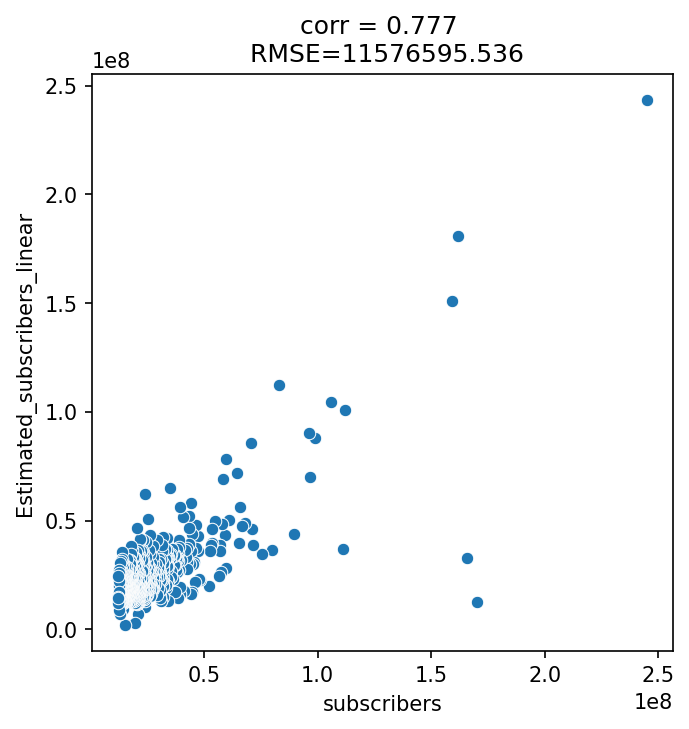

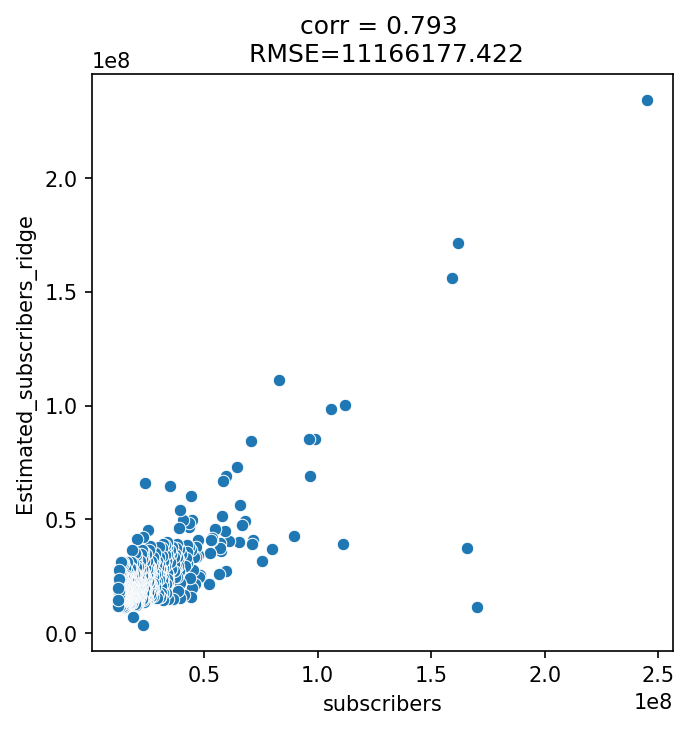

In [89]:
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion

## Conclusion

In this analysis, we employed Linear Regression and Ridge Regression models to predict YouTube subscribers using a range of encoded features. The results indicated that:

- **Linear Regression**:
  - Correlation: **0.777**
  - RMSE: **11,576,595.536**

- **Ridge Regression** (with different solvers):
  
  - When **alpha = 1**:
  
    - **solver = 'auto'**:
      - Correlation: **0.78**
      - RMSE: **11,897,207.074**
    
    - **solver = 'lsqr'**:
      - Correlation: **0.784**
      - RMSE: **11,384,048.775**
    
    - **solver = 'saga'**:
      - Correlation: **0.793**
      - RMSE: **11,166,199.136**

After testing multiple alpha values with the `solver='auto'`, I found that increasing the alpha to 100 resulted in lower correlation and higher RMSE. Decreasing the alpha to 0.001 did not change the results. This led me to explore other solvers. When using the `solver='saga'`, Ridge Regression provided the best performance, achieving the highest correlation and lowest RMSE.


## Discussion

The correlation coefficients for both models are similar, indicating that both approaches capture the relationship between the features and the target variable effectively. Ridge Regression, particularly with the `saga` solver, achieved the best results, with a higher correlation and lower RMSE, indicating improved predictive accuracy over Linear Regression.

Using saga is beneficial when working with larger datasets, especially if there are many features or sparse data, as it tends to provide better performance in these scenarios. I suggest that the results are better with the saga solver due to the one-hot encoding of categorical variables, which often results in sparse matrices

### Pros and Cons:

- **Linear Regression**:
  - **Pros**:
    - Simple and interpretable.
    - Fast computation.
  - **Cons**:
    - May struggle with multicollinearity.
    - Sensitive to outliers.

- **Ridge Regression**:
  - **Pros**:
    - Handles multicollinearity better.
    - Allows for regularization, improving prediction.
  - **Cons**:
    - More complex due to regularization.
    - Slightly higher RMSE in some cases.

### Next Steps:
To further improve the predictive models, the following steps could be explored:
- **Hyperparameter Tuning**: Perform Grid Search to optimize the alpha value for Ridge Regression.
- **Feature Engineering**: Add or transform features to better capture the relationships in the data.

In conclusion, Ridge Regression (with the `saga` solver) shows promise, but further refinement and exploration of different modeling techniques could possibly enhance performance even more.

